In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 8.5 MB/s 


In [ ]:
import neattext.functions as nfx

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/nlp1.csv")

In [ ]:
df.head()

,text,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
df.emotion.value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: emotion, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

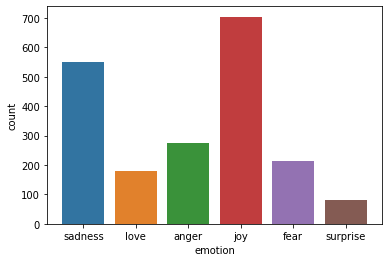

In [ ]:
sns.countplot(df.emotion)
plt.plot()

In [ ]:
df["clean_text"] = df.text.apply(nfx.remove_userhandles)

In [ ]:
df["clean_text"] = df.clean_text.apply(nfx.remove_stopwords)

In [ ]:
x = df.clean_text
y = df.emotion

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 11)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps = [
    ("cv", CountVectorizer()),
    ("lr", LogisticRegression())
])

In [ ]:
pipe

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe.score(x_train,y_train)

0.9928571428571429

In [ ]:
pipe.score(x_test,y_test)

0.7083333333333334

In [ ]:
ex = "the book i was currently reading is bad, it made me furious"

In [ ]:
pipe.predict([ex])

array(['anger'], dtype=object)

In [ ]:
pipe.predict_proba([ex])

array([[0.50516146, 0.04274192, 0.07040404, 0.0126109 , 0.36145344,
        0.00762824]])

In [ ]:
pipe.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [ ]:
import pickle

In [ ]:
with open("model_pickel","wb") as f:
  pickle.dump(pipe, f)